In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [6]:
%load_ext autoreload
%autoreload 2


In [7]:
from model_equations_separate_NC_sep_vmax import *

In [8]:
import run_sensitivity

In [153]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [10]:
import os
os.listdir()

['.git',
 '.gitattributes',
 '.gitignore',
 '.ipynb_checkpoints',
 'calc_csat.py',
 'cluster_assignment.csv.gz',
 'doc',
 'master model notebook.ipynb',
 'model_equations.py',
 'model_equations_no_quota.py',
 'model_equations_separate_NC.py',
 'model_equations_separate_NC_sep_vmax.py',
 'model_NC_analyze_clusters.ipynb',
 'model_NC_cc.ipynb',
 'model_NC_cc_mechanisms.ipynb',
 'model_NC_cc_optimize.ipynb',
 'model_NC_honly.ipynb',
 'model_NC_lookup before signal resp.ipynb',
 'model_NC_lookup.ipynb',
 'model_NC_ponly.ipynb',
 'model_NC_salib.ipynb',
 'model_noquota_cc.ipynb',
 'model_noquota_honly.ipynb',
 'model_noquota_ponly.ipynb',
 'Model_Parameters.xlsx',
 'model_param_sensitivity.ipynb',
 'model_param_sensitivity_ponly.ipynb',
 'model_quota_cc.ipynb',
 'model_quota_honly.ipynb',
 'model_quota_ponly.ipynb',
 'param_values_log.txt.gz',
 'prelim_bottle.csv',
 'prepare_data',
 'README.md',
 'reference_10cc.xlsx',
 'results_postprocess.py',
 'run_files',
 'run_sensitivity.py',
 'sensit

In [11]:
refdf = pd.read_excel('reference_10cc.xlsx')


In [12]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
os.listdir(dpath)

['param_sensitivity_29062023_df.csv.gz',
 'param_sensitivity_29062023_sum.csv.gz']

In [13]:

sum_df = pd.read_csv(os.path.join(dpath,'param_sensitivity_29062023_sum.csv.gz' ))
df =  pd.read_csv(os.path.join(dpath,'param_sensitivity_29062023_df.csv.gz' ))




In [14]:
df.columns

Index(['Unnamed: 0', 'Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       'ABp', 'ABh', 't', 'day', 'Xp', 'limINp', 'limONp', 'limICp', 'limOCp',
       'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'net_uptakeNp', 'overflowNp', 'overflowCp', 'deathp',
       'leakinessOp', 'leakinessIp', 'ROSreleasep', 'respirationp',
       'dic_air_water_exchange', 'Bp[C]', 'ABp[C]', 'ABh[C]', 'run_id', 'Bh',
       'Xh', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINh',
       'gross_uptakeONh', 'gross_uptakeICh', 'gross_uptakeOCh', 'net_uptakeNh',
       'overflowNh', 'overflowCh', 'deathh', 'leakinessOh', 'leakinessIh',
       'ROSbreakdownh', 'respirationh', 'exp(-omegaP*ROS)', 'Bh[C]'],
      dtype='object')

In [15]:
ponlydf =  df.loc[df.run_id.str.contains('_ponly_')]

In [47]:
ponly_sum_df =  sum_df.loc[sum_df.run_id.str.contains('_ponly_') & ~sum_df.run_id.str.contains('_HET_')].copy()
ponlydf =  df.loc[df.run_id.str.contains('_ponly_') & ~df.run_id.str.contains('_HET_')].copy()

In [17]:
ponly_sum_df['run_id'].unique()

array(['param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxICp_4_h-6339873873566414661',
       'param_sensitivity_ponly_FULL_PRO_FULL_Mp_1_h5988958101455714847',
       'param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_5_h745818283540321754',
       'param_sensitivity_ponly_MIXO_PRO_MIXO_KINp_0_h-1985130526713526465',
       'param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_15_h-7159845802283383659',
       'param_sensitivity_ponly_MIXO_PRO_MIXO_KICp_7_h4769606317293665789',
       'param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_10_h3294892648061130894',
       'param_sensitivity_ponly_MIN_PRO_MIN_KINp_8_h2857973285050241431',
       'param_sensitivity_ponly_MIN_PRO_MIN_gammaDp_8_h-1144943849246832335',
       'param_sensitivity_ponly_MIN_PRO_MIN_VmaxICp_18_h6474893277231313823',
       'param_sensitivity_ponly_FULL_PRO_FULL_KABp_15_h-5199587473491953030',
       'param_sensitivity_ponly_MIXO_PRO_MIXO_Mp_9_h7107750570031241536',
       'param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_7_h4491245842262922118',


In [18]:
#param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_11_h544066040463290079

ponly_sum_df[['sen_param_model', 'idx']] = ponly_sum_df.run_id.str.replace('.*_PRO_', '', regex=True
            ).str.replace(r'_h[\-]?\d+$','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [19]:
ponly_sum_df[['model', 'sen_param']] = ponly_sum_df.sen_param_model.str.split('_', n=1, expand=True)

In [66]:
#param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_11_h544066040463290079

ponlydf[['sen_param_model', 'idx']] = ponlydf.run_id.str.replace('.*_PRO_', '', regex=True
            ).str.replace(r'_h[\-]?\d+$','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [67]:
ponlydf[['model', 'sen_param']] = ponlydf.sen_param_model.str.split('_', n=1, expand=True)

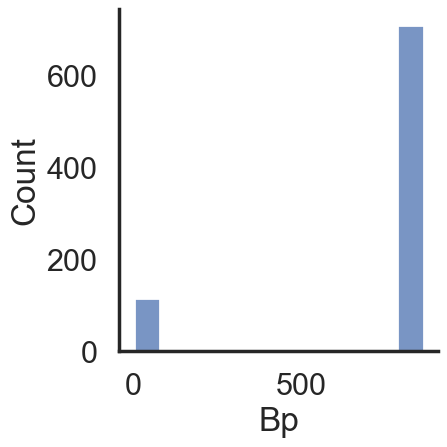

In [73]:
sns.displot(ponlydf.groupby(['run_id' ]).Bp.count().reset_index().sort_values('Bp').Bp)
plt.show()

In [132]:
def _mse(refdf, x, refcol= 'ref_Bp', col='Bp', timecol='t'):
    #print(x.columns)
    tdf = pd.merge_asof(x[[timecol, col]], refdf[[timecol, refcol]], on=timecol, direction='nearest', tolerance=3600*4).dropna()
    return pd.Series({
        'compare_points': tdf.shape[0], 
        'MSE': mean_squared_error(tdf[col], tdf[refcol])}
    )


In [133]:
refdf.columns

Index(['day', 'Sample', 'id', 'replicate', 'transfer', 'transfer day',
       'heterotroph', 'full name', 'FL', 'Group', 'predicted', 'ref_Bp', 'LOD',
       't'],
      dtype='object')

In [134]:
def _mse_all(x):
    #print (x)
    return refdf.groupby(['Sample', 'id', 'full name', 'Group',]).apply(lambda y : _mse(y,x))

In [135]:
rdf = refdf.loc[ refdf.Sample.isin(['1A0'])]

_mse(rdf,ponlydf.loc[ponlydf.run_id.isin([run_id])])


compare_points    164.000000
MSE               289.658089
dtype: float64

In [136]:
mse_df = ponlydf.groupby(['sen_param', 'model', 'idx', 'run_id' ]).apply(lambda x : _mse_all(x))

In [138]:
mse_df = mse_df.reset_index()

In [143]:
msefilter_df = mse_df.loc[(mse_df.compare_points>20) & mse_df.Group.isin(['Axenic'])]

In [167]:
msefilter_df.sort_values('MSE').groupby('model').head(7).sort_values(['model', 'MSE'])

sen_param model idx                                             run_id  \
16296   VmaxINp  FULL  10  param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...   
16326   VmaxINp  FULL  11  param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...   
16297   VmaxINp  FULL  10  param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...   
16328   VmaxINp  FULL  11  param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...   
2496     E_ROSp  FULL  11  param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...   
2526     E_ROSp  FULL  12  param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...   
24126    omegaP  FULL  11  param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...   
12006        Mp  LEAK   0  param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_0_h91...   
12036        Mp  LEAK   1  param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_1_h-6...   
12366        Mp  LEAK   2  param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_2_h-7...   
12396        Mp  LEAK   3  param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_3_h-7...   
12007        Mp  LEAK   0  param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_0_h91...   
12426        Mp  LEAK   4  param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_4_h53...   
12037        Mp  LEAK   1  param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_1_h-6...   
17496   VmaxINp   MIN  10  param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_10...   
17526   VmaxINp   MIN  11  param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_11...   
17556   VmaxINp   MIN  12  param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_12...   
17586   VmaxINp   MIN  13  param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_13...   
17616   VmaxINp   MIN  14  param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_14...   
17646   VmaxINp   MIN  15  param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_15...   
17676   VmaxINp   MIN  16  param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_16...   
18126   VmaxINp  MIXO  11  param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_...   
20976   VmaxONp  MIXO   8  param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxONp_...   
13716        Mp  MIXO   7  param_sensitivity_ponly_MIXO_PRO_MIXO_Mp_7_h-9...   
18128   VmaxINp  MIXO  11  param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_...   
20946   VmaxONp  MIXO   7  param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxONp_...   
18127   VmaxINp  MIXO  11  param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_...   
18156   VmaxINp  MIXO  12  param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_...   

      Sample  id full name   Group  compare_points         MSE  
16296    1A0   1    Axenic  Axenic           164.0  114.011222  
16326    1A0   1    Axenic  Axenic           164.0  120.944405  
16297    1B0   1    Axenic  Axenic           164.0  144.681760  
16328    1C0   1    Axenic  Axenic           164.0  147.990424  
2496     1A0   1    Axenic  Axenic           164.0  150.577655  
2526     1A0   1    Axenic  Axenic           164.0  150.900760  
24126    1A0   1    Axenic  Axenic           164.0  151.795760  
12006    1A0   1    Axenic  Axenic           164.0  168.004914  
12036    1A0   1    Axenic  Axenic           164.0  170.950261  
12366    1A0   1    Axenic  Axenic           164.0  176.579816  
12396    1A0   1    Axenic  Axenic           164.0  186.560221  
12007    1B0   1    Axenic  Axenic           164.0  202.038048  
12426    1A0   1    Axenic  Axenic           164.0  204.555244  
12037    1B0   1    Axenic  Axenic           164.0  204.874885  
17496    1A0   1    Axenic  Axenic           164.0  162.763092  
17526    1A0   1    Axenic  Axenic           164.0  162.801197  
17556    1A0   1    Axenic  Axenic           164.0  162.828340  
17586    1A0   1    Axenic  Axenic           164.0  162.848017  
17616    1A0   1    Axenic  Axenic           164.0  162.862550  
17646    1A0   1    Axenic  Axenic           164.0  162.873437  
17676    1A0   1    Axenic  Axenic           164.0  162.881679  
18126    1A0   1    Axenic  Axenic           164.0  141.052151  
20976    1A0   1    Axenic  Axenic           164.0  168.216489  
13716    1A0   1    Axenic  Axenic           164.0  177.107622  
18128    1C0   1    Axenic  Axenic           164.0  177.8471

In [144]:
msefilter_df.nsmallest(columns='MSE', n=20)

sen_param model idx                                             run_id  \
16296   VmaxINp  FULL  10  param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...   
16326   VmaxINp  FULL  11  param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...   
18126   VmaxINp  MIXO  11  param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_...   
16297   VmaxINp  FULL  10  param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...   
16328   VmaxINp  FULL  11  param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...   
2496     E_ROSp  FULL  11  param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...   
2526     E_ROSp  FULL  12  param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...   
24126    omegaP  FULL  11  param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...   
24156    omegaP  FULL  12  param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...   
2466     E_ROSp  FULL  10  param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...   
24096    omegaP  FULL  10  param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...   
2556     E_ROSp  FULL  13  param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...   
6006       KINp  FULL   0  param_sensitivity_ponly_FULL_PRO_FULL_KINp_0_h...   
6036       KINp  FULL   1  param_sensitivity_ponly_FULL_PRO_FULL_KINp_1_h...   
6366       KINp  FULL   2  param_sensitivity_ponly_FULL_PRO_FULL_KINp_2_h...   
6396       KINp  FULL   3  param_sensitivity_ponly_FULL_PRO_FULL_KINp_3_h...   
6426       KINp  FULL   4  param_sensitivity_ponly_FULL_PRO_FULL_KINp_4_h...   
6456       KINp  FULL   5  param_sensitivity_ponly_FULL_PRO_FULL_KINp_5_h...   
16327   VmaxINp  FULL  11  param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...   
6486       KINp  FULL   6  param_sensitivity_ponly_FULL_PRO_FULL_KINp_6_h...   

      Sample  id full name   Group  compare_points         MSE  
16296    1A0   1    Axenic  Axenic           164.0  114.011222  
16326    1A0   1    Axenic  Axenic           164.0  120.944405  
18126    1A0   1    Axenic  Axenic           164.0  141.052151  
16297    1B0   1    Axenic  Axenic           164.0  144.681760  
16328    1C0   1    Axenic  Axenic           164.0  147.990424  
2496     1A0   1    Axenic  Axenic           164.0  150.577655  
2526     1A0   1    Axenic  Axenic           164.0  150.900760  
24126    1A0   1    Axenic  Axenic           164.0  151.795760  
24156    1A0   1    Axenic  Axenic           164.0  153.268338  
2466     1A0   1    Axenic  Axenic           164.0  154.371878  
24096    1A0   1    Axenic  Axenic           164.0  154.717112  
2556     1A0   1    Axenic  Axenic           164.0  155.258454  
6006     1A0   1    Axenic  Axenic           164.0  155.436623  
6036     1A0   1    Axenic  Axenic           164.0  155.501265  
6366     1A0   1    Axenic  Axenic           164.0  155.583616  
6396     1A0   1    Axenic  Axenic           164.0  155.688521  
6426     1A0   1    Axenic  Axenic           164.0  155.822145  
6456     1A0   1    Axenic  Axenic           164.0  155.992332  
16327    1B0   1    Axenic  Axenic           164.0  156.191510  
6486     1A0   1    Axenic  Axenic           164.0  156.209059

In [147]:
ponlydf.columns

Index(['Unnamed: 0', 'Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       'ABp', 'ABh', 't', 'day', 'Xp', 'limINp', 'limONp', 'limICp', 'limOCp',
       'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'net_uptakeNp', 'overflowNp', 'overflowCp', 'deathp',
       'leakinessOp', 'leakinessIp', 'ROSreleasep', 'respirationp',
       'dic_air_water_exchange', 'Bp[C]', 'ABp[C]', 'ABh[C]', 'run_id', 'Bh',
       'Xh', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINh',
       'gross_uptakeONh', 'gross_uptakeICh', 'gross_uptakeOCh', 'net_uptakeNh',
       'overflowNh', 'overflowCh', 'deathh', 'leakinessOh', 'leakinessIh',
       'ROSbreakdownh', 'respirationh', 'exp(-omegaP*ROS)', 'Bh[C]',
       'sen_param_model', 'idx', 'model', 'sen_param'],
      dtype='object')

In [82]:
mdf = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccxorder+ccnorder+cccorder)

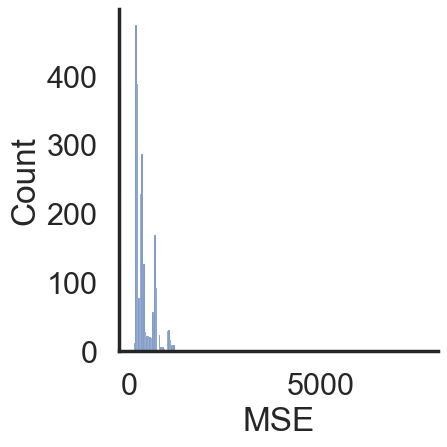

In [150]:
sns.displot(msefilter_df.MSE,)
#sns.distplot(sum_df.p_err, label='P')
#sns.distplot(sum_df.error, label='Total')
#plt.legend()
plt.show()

In [152]:
ponlydf.min()

Unnamed: 0                                                                0
Bp                                                                      0.0
DON                                                                0.018419
RDON                                                                    0.0
DIN                                                                0.003807
DOC                                                               93.727911
RDOC                                                                    0.0
DIC                                                                0.012707
ROS                                                                0.019278
ABp                                                                     0.0
ABh                                                                     0.0
t                                                                       0.0
day                                                                     0.0
Xp          

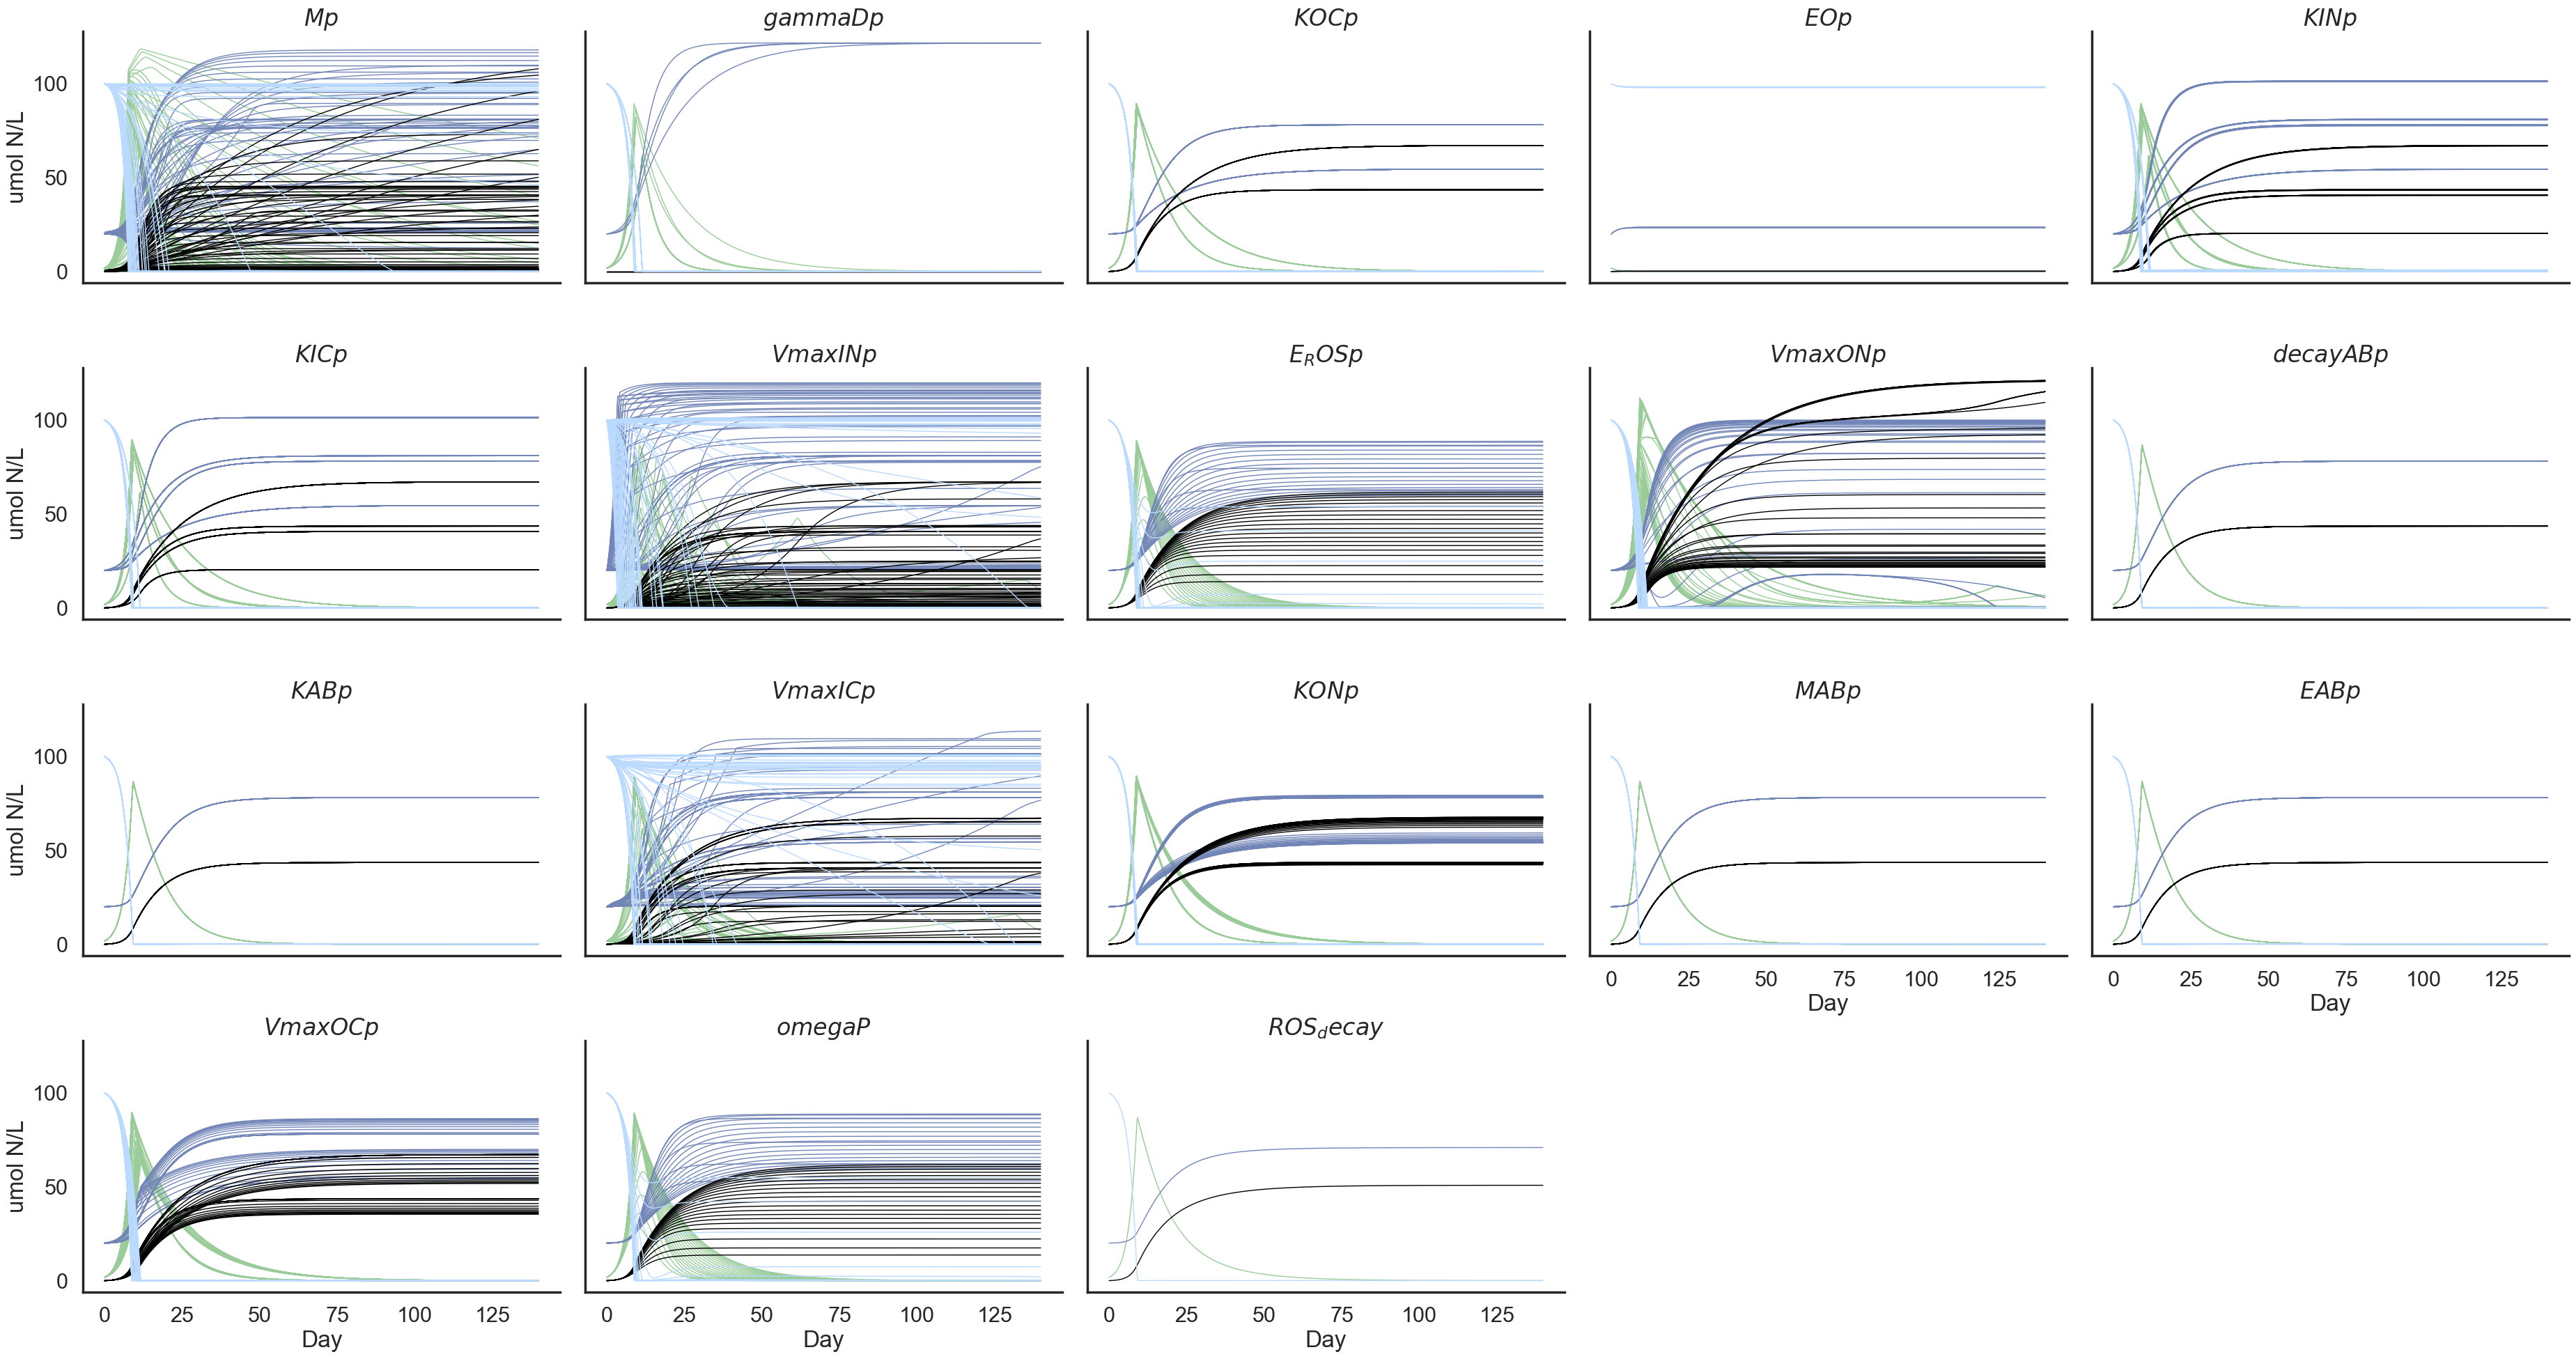

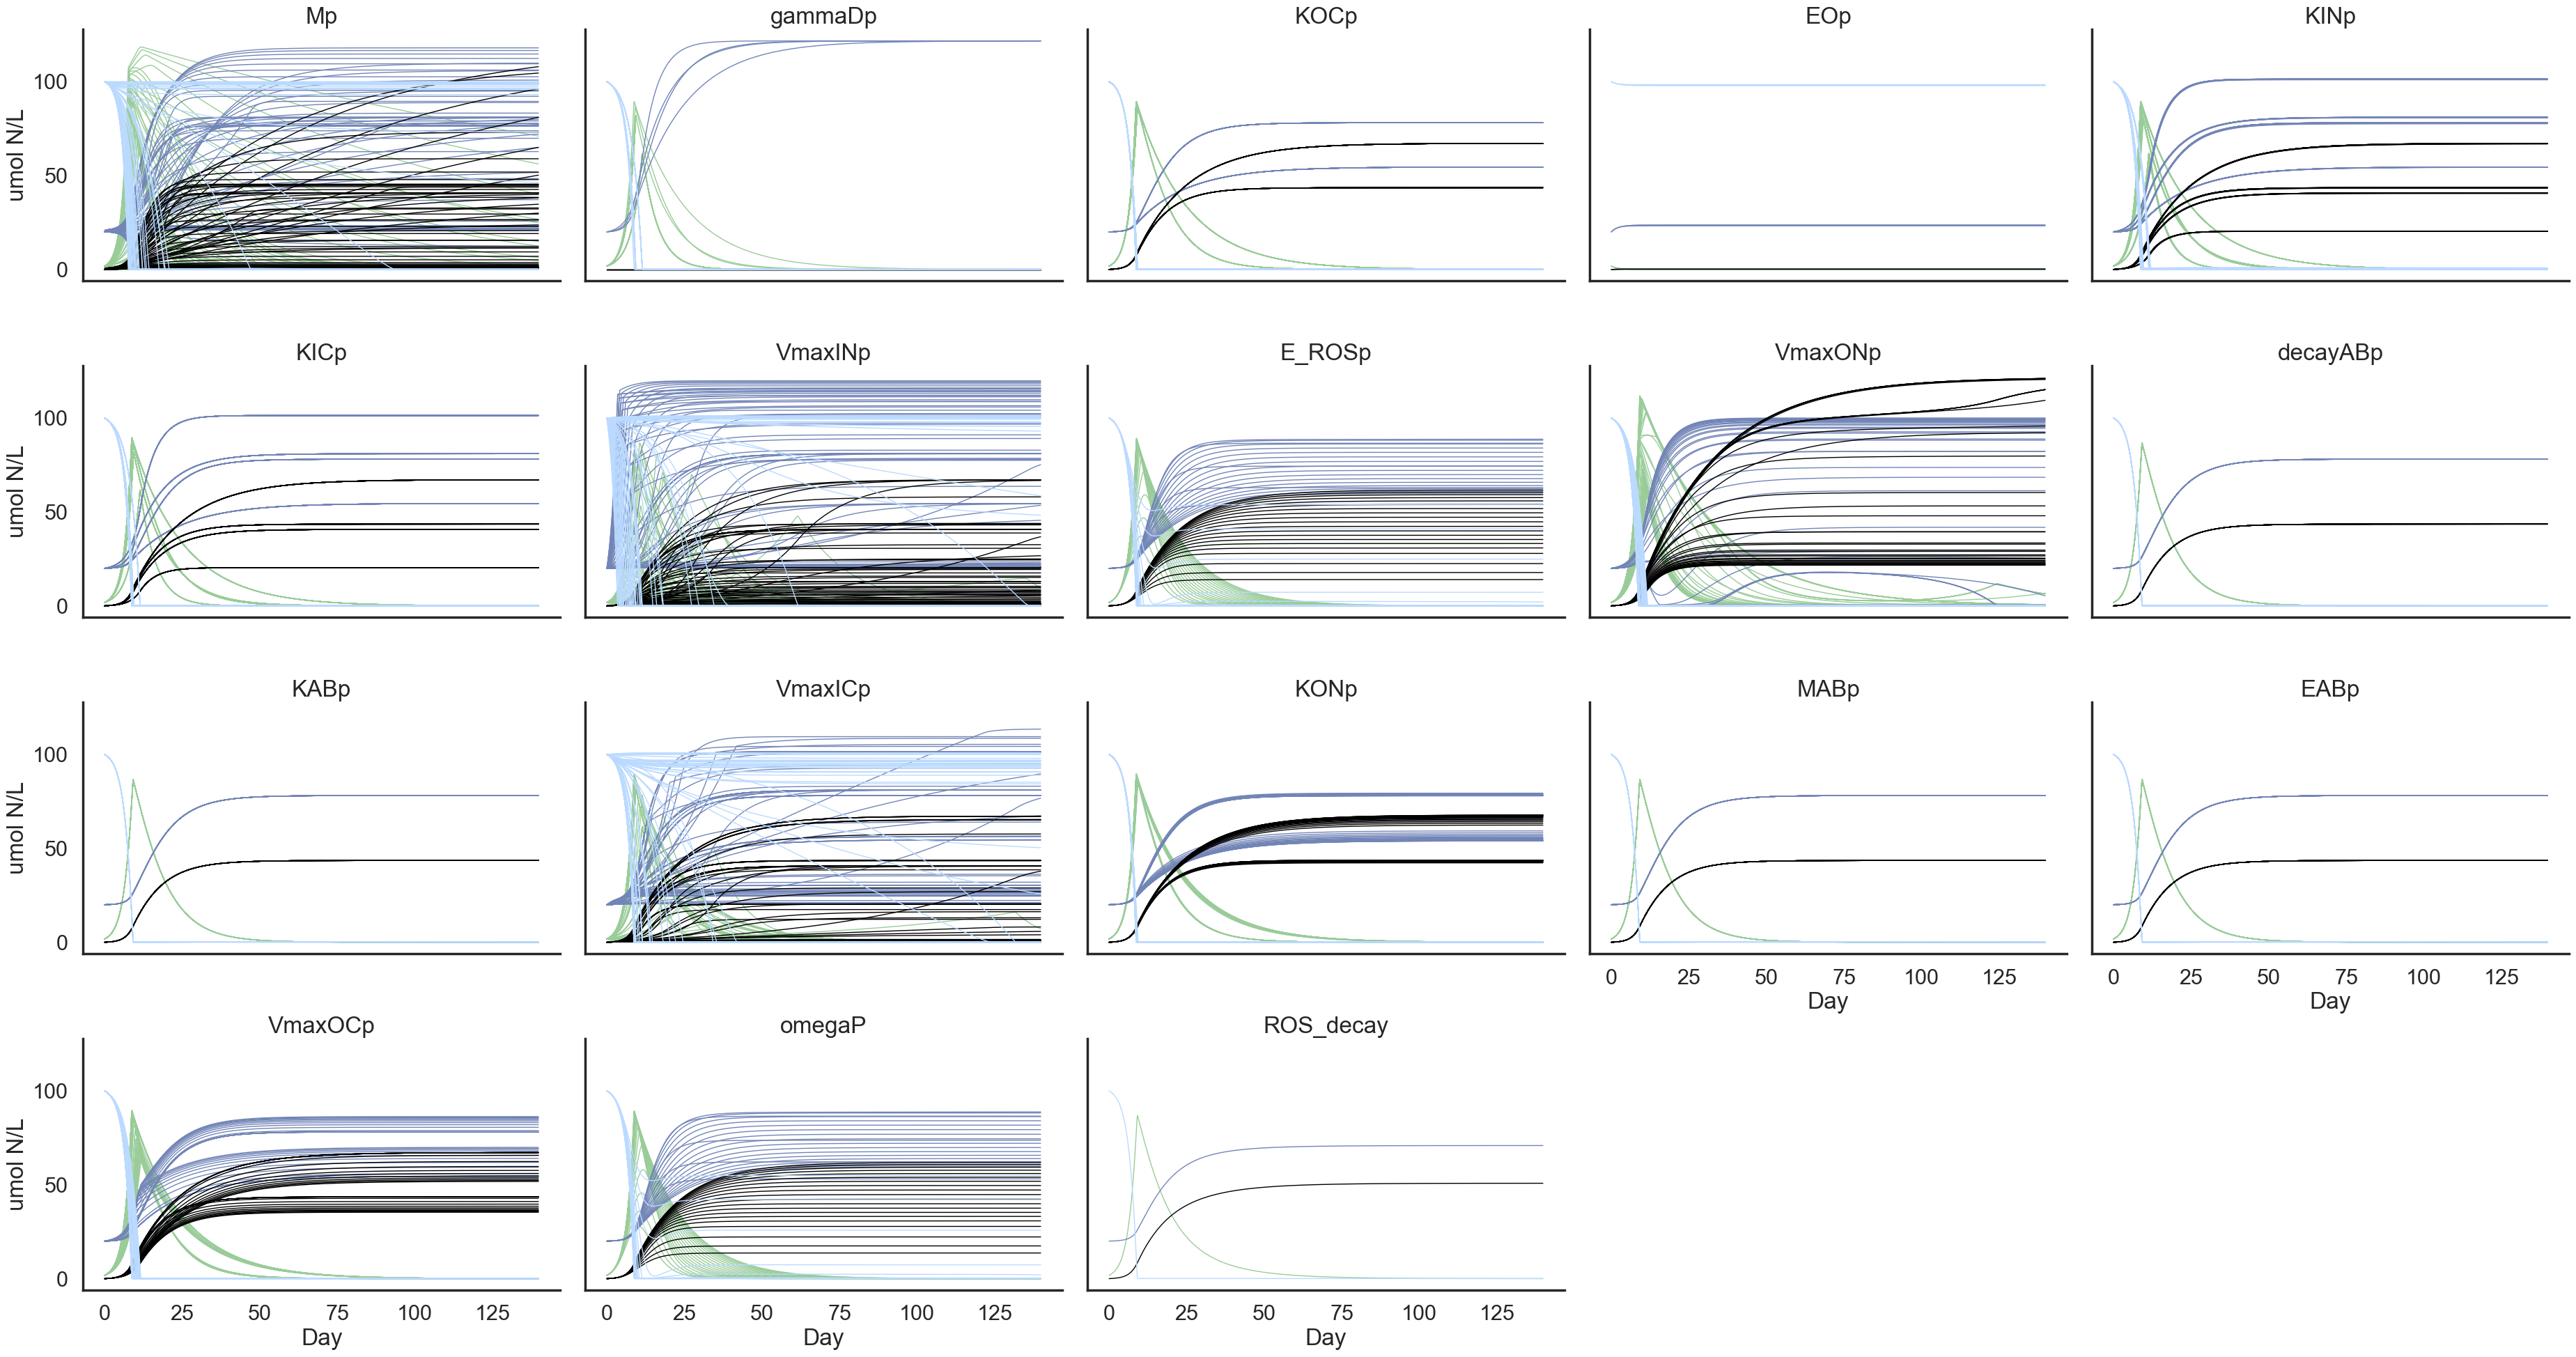

In [155]:
mdf2 = ponlydf.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

#mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


g = sns.relplot(
    data=mdf2, 
    x='Day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    estimator=None, units='run_id',
    col='sen_param', #col_order= paramorder,
    col_wrap=5,
    kind='line', lw=1,
    aspect=1.5, legend=False,
)
    


#g.map_dataframe(pp)


g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)
plt.show()

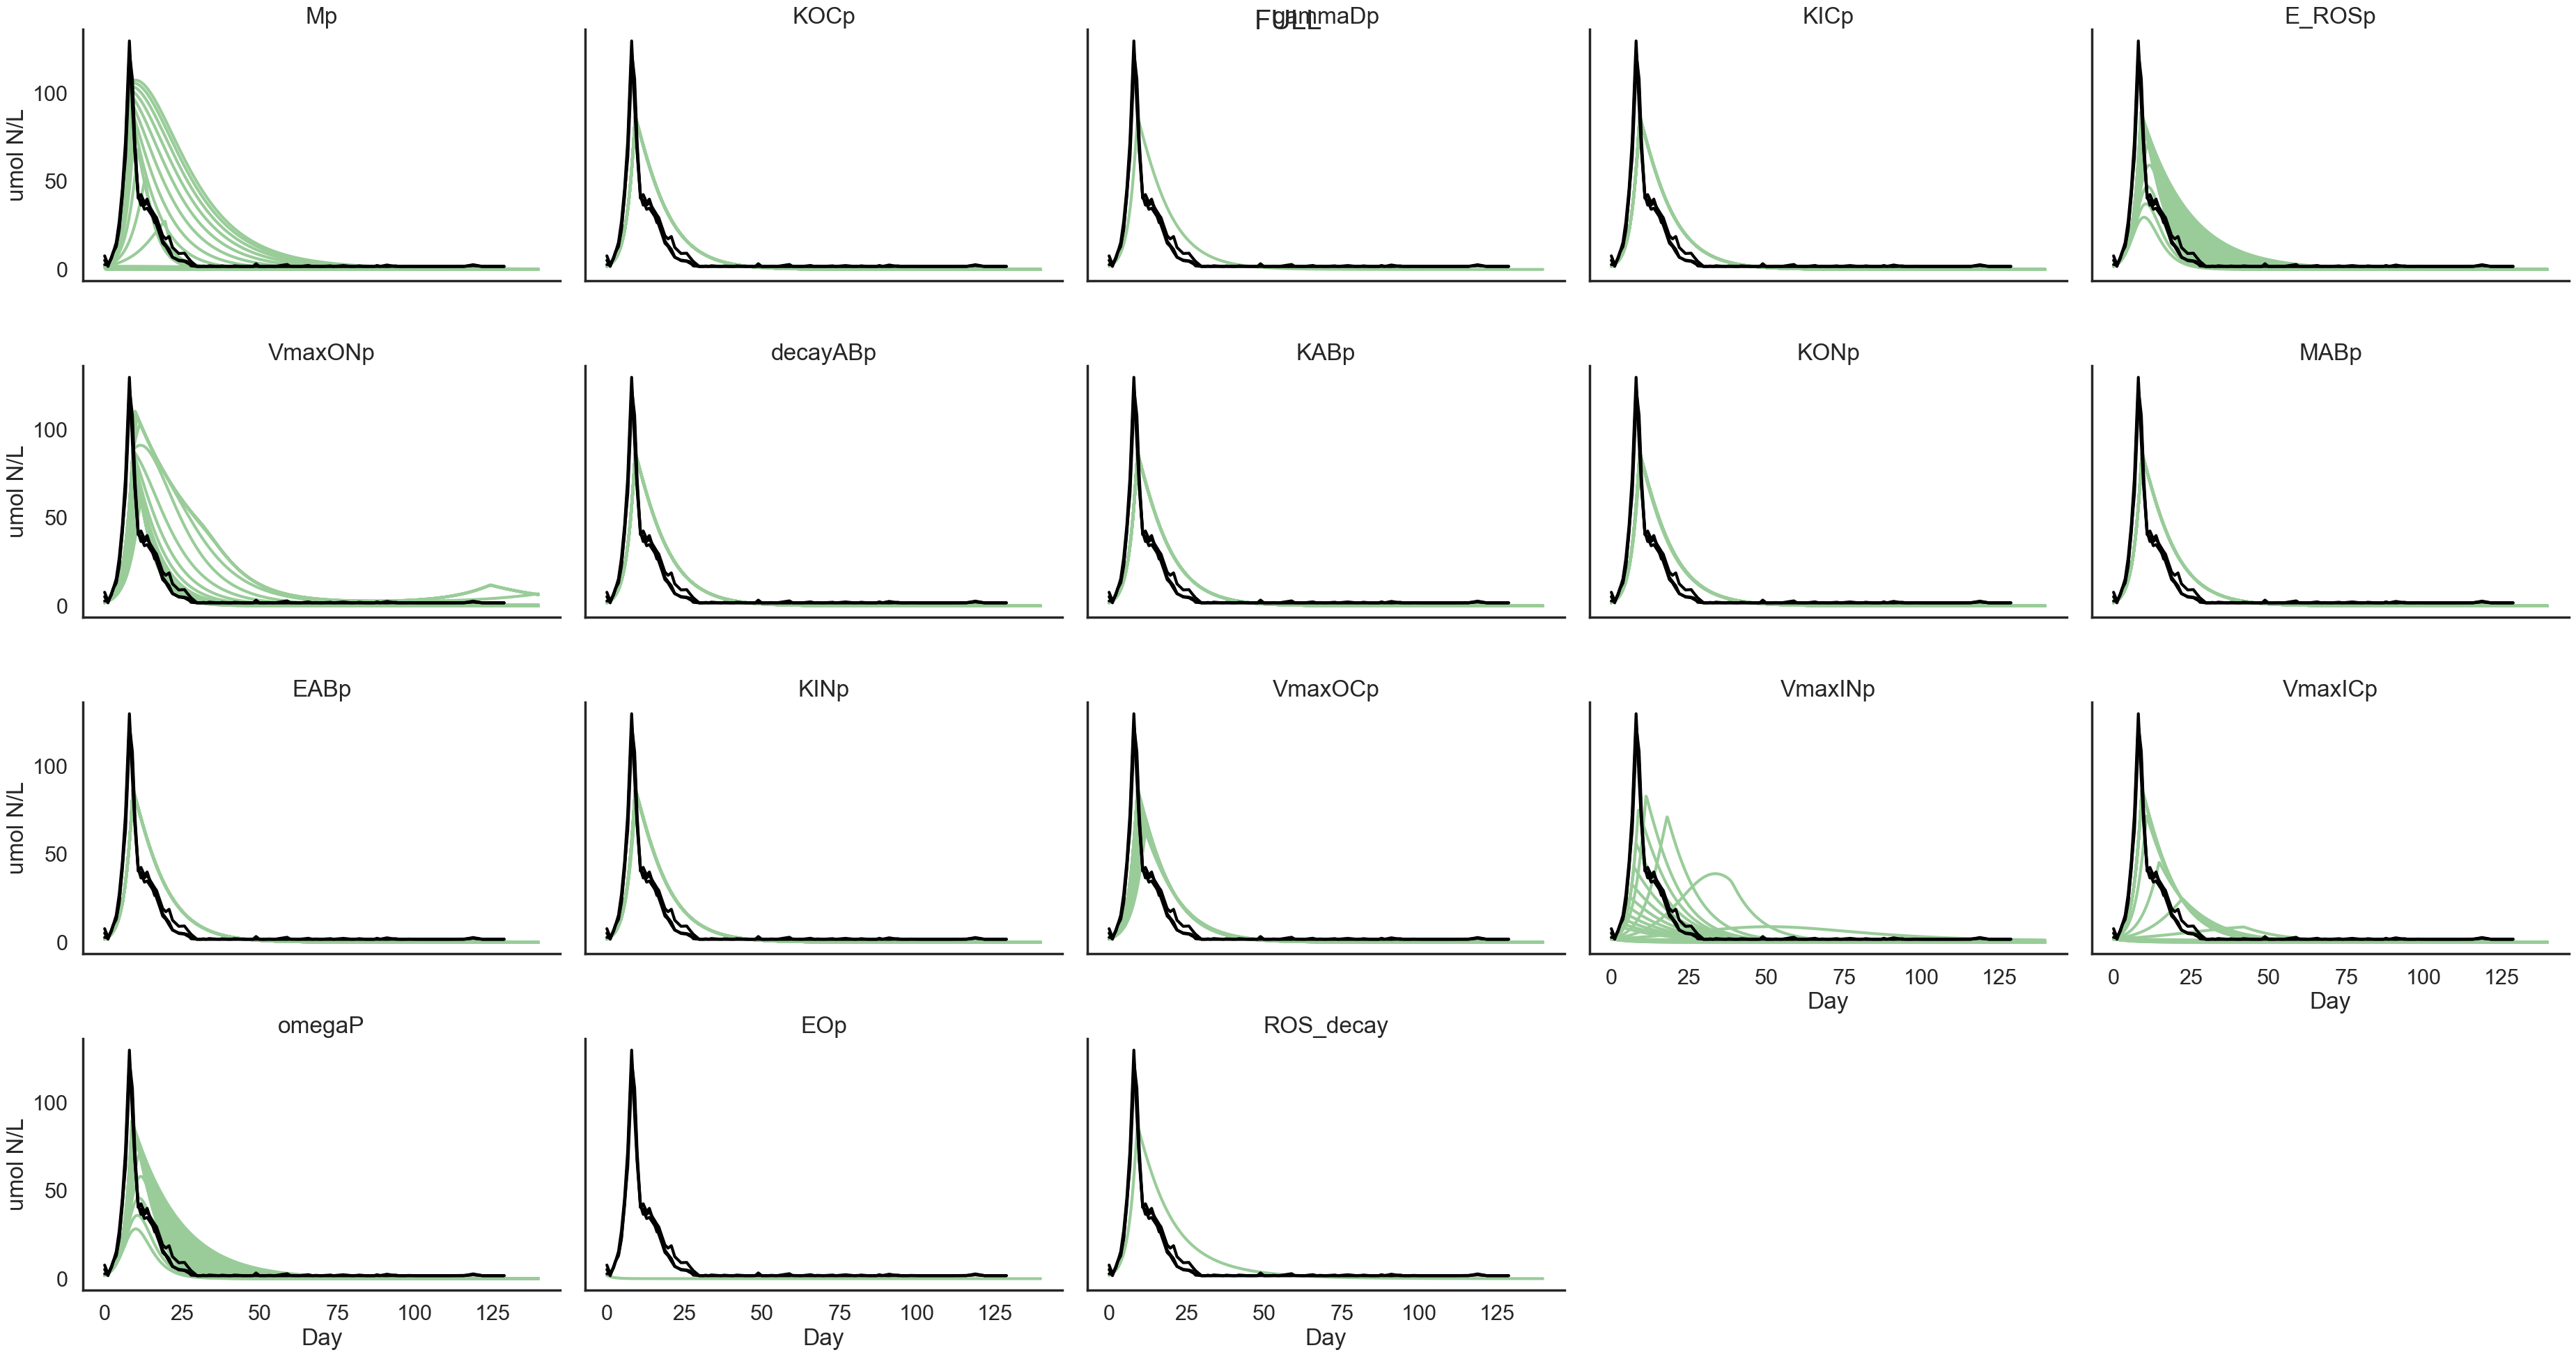

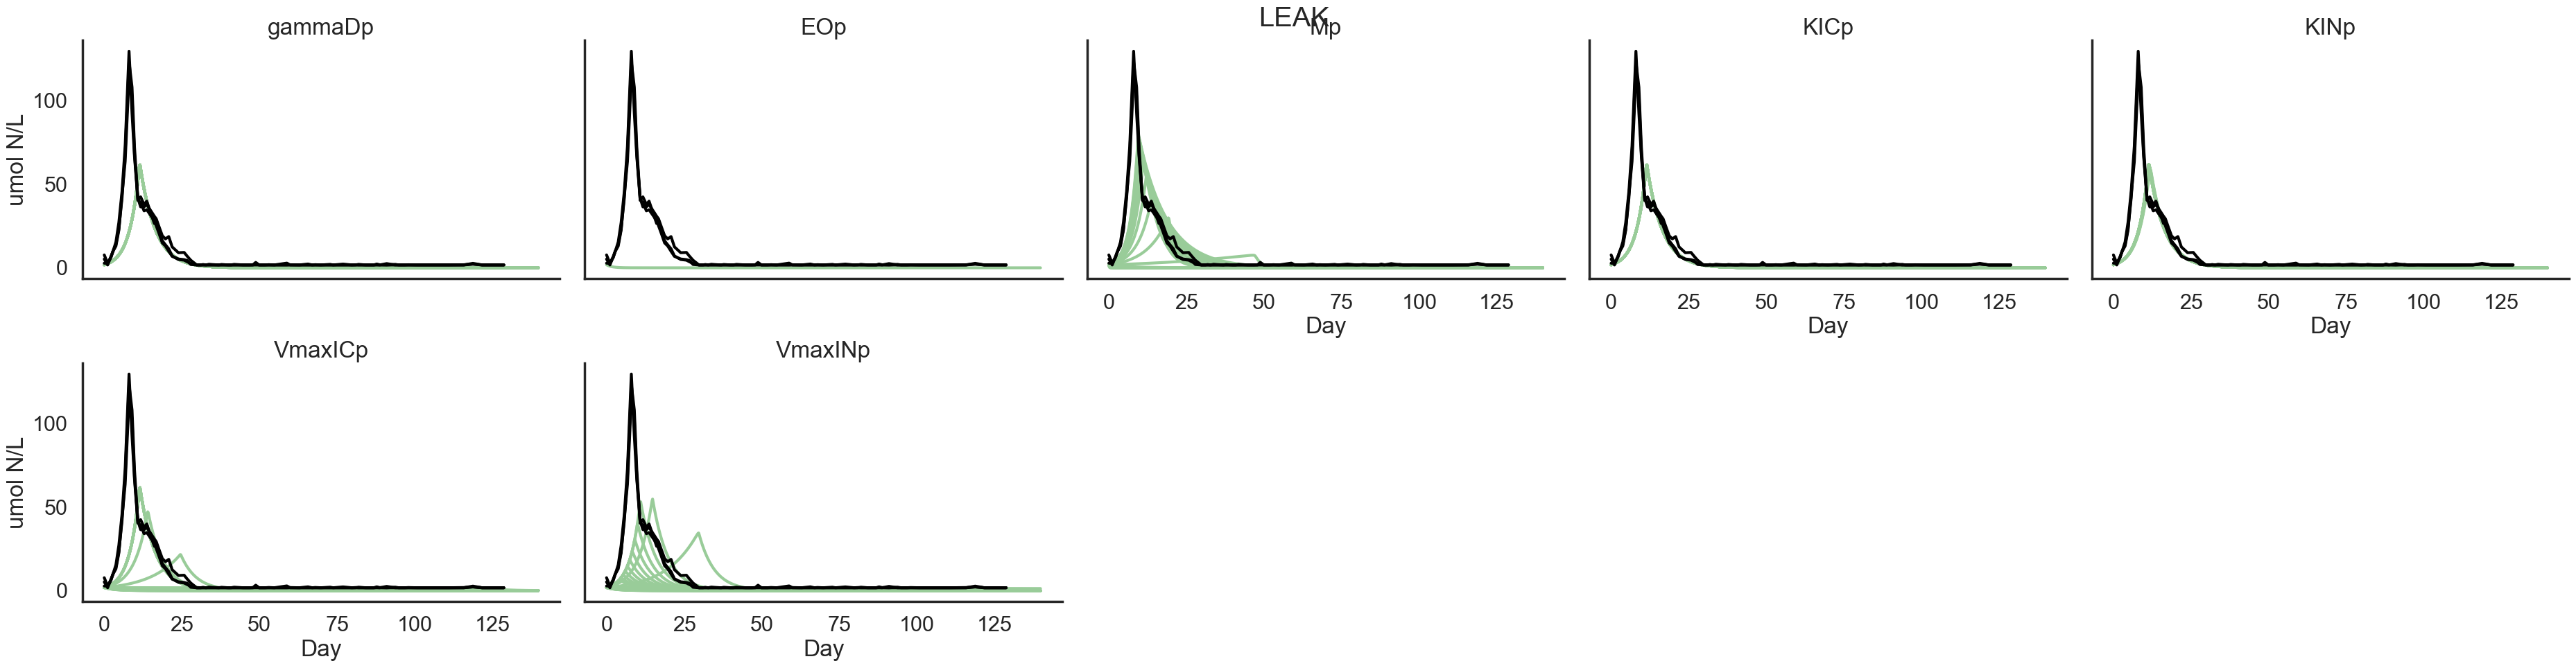

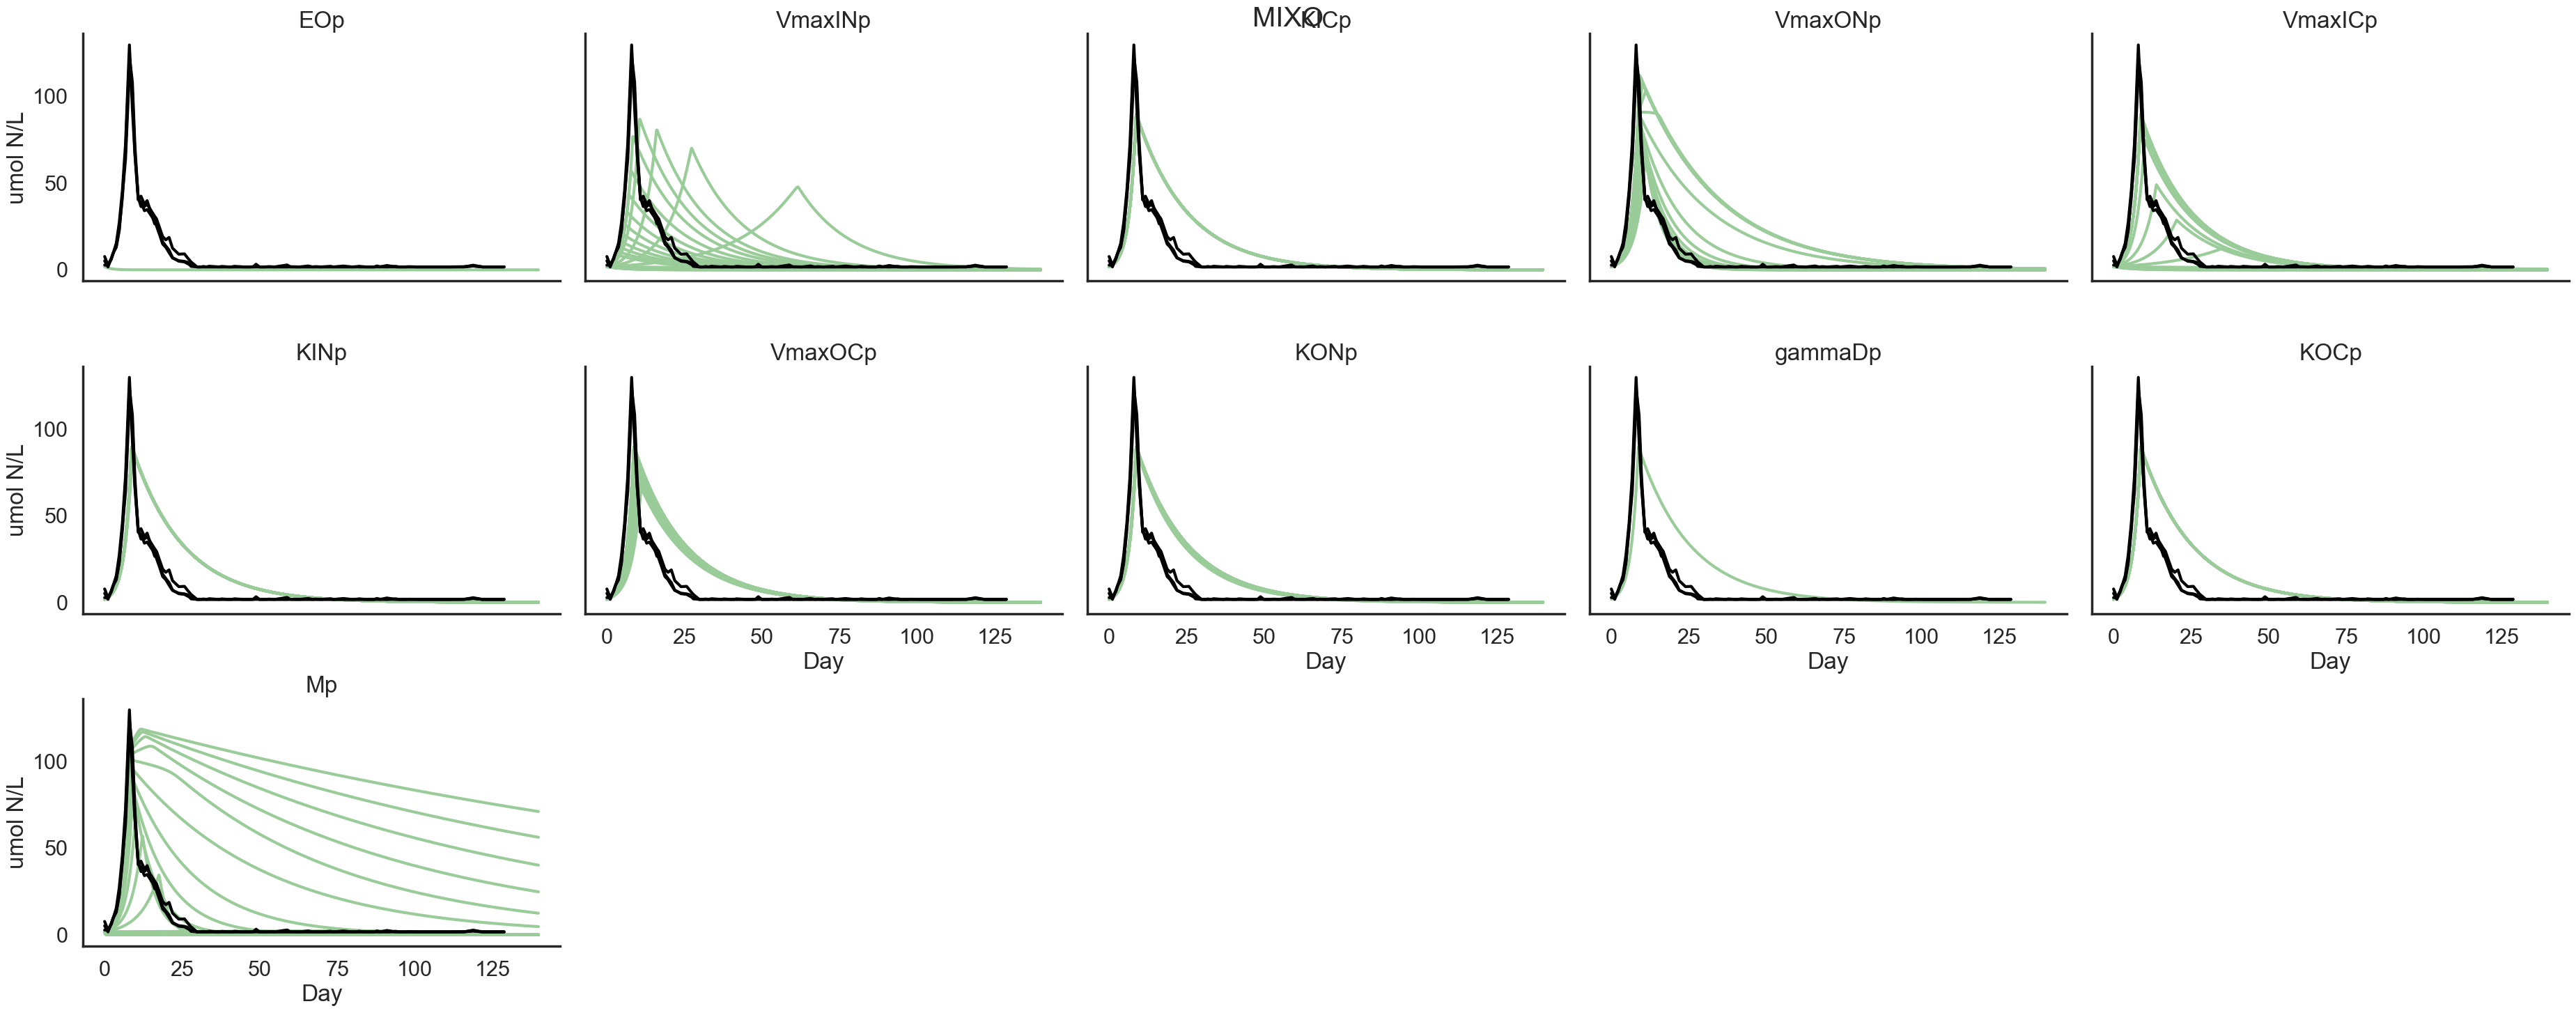

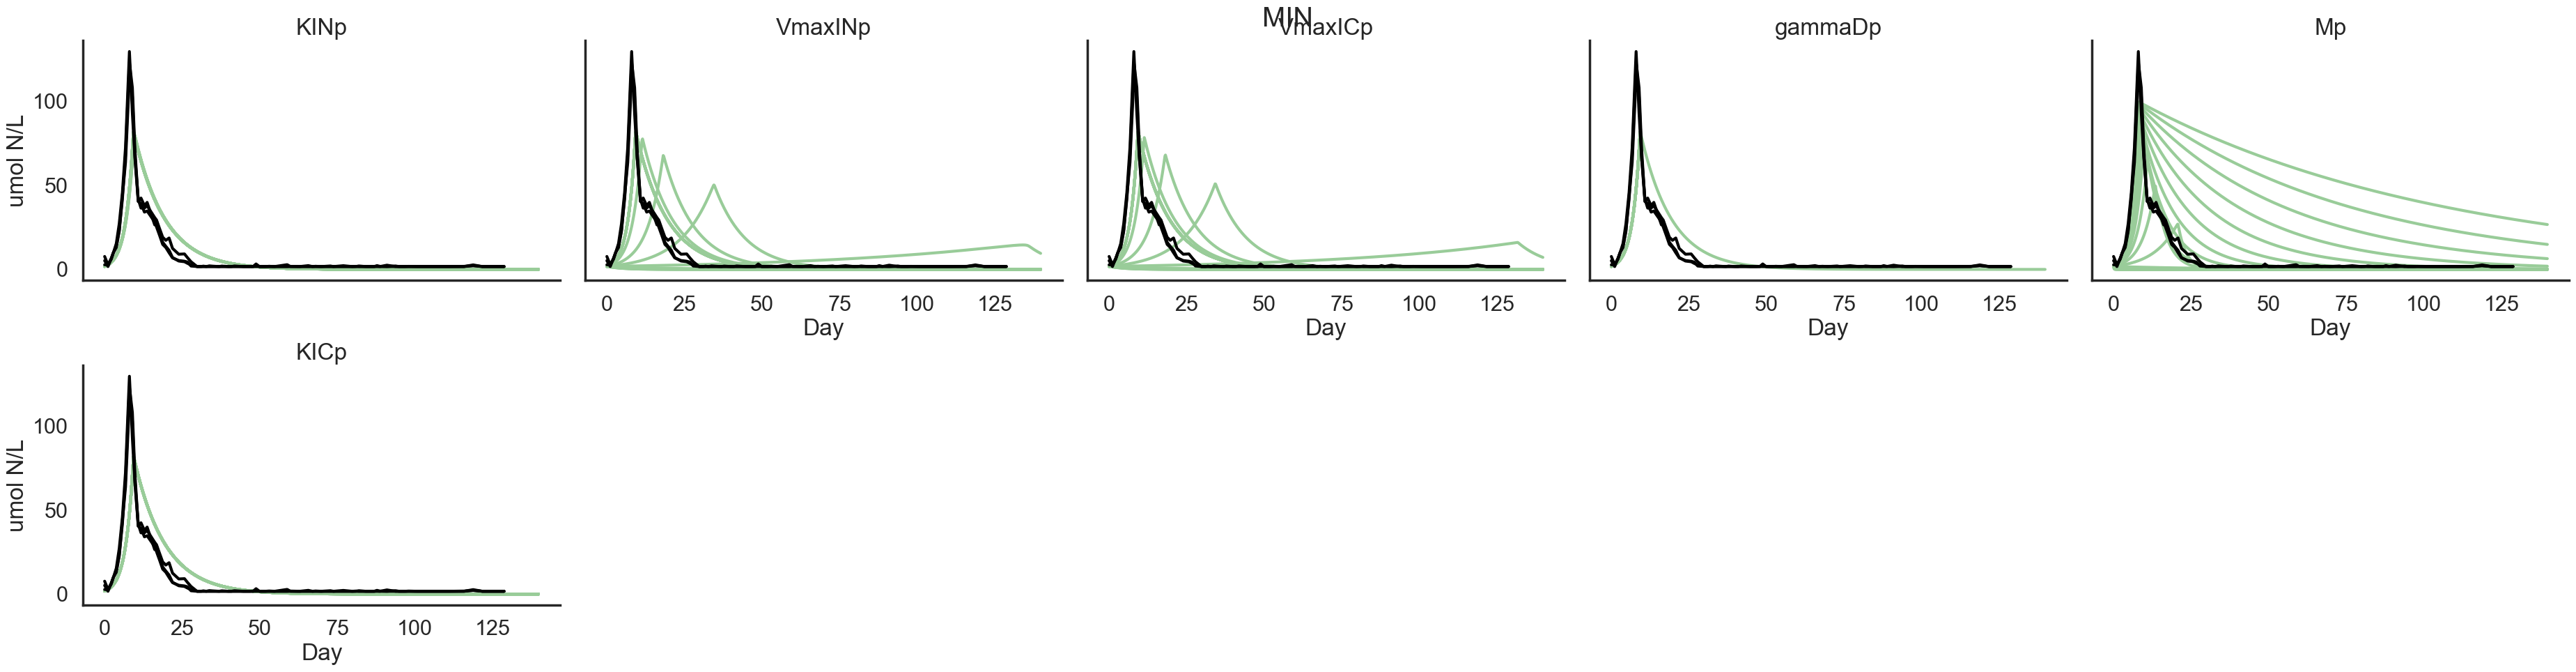

In [159]:
for m in ponlydf.model.unique():
    mdf2 = ponlydf.loc[ponlydf.model.isin([m])].melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=['Bp'])                            
    mdf2['Day'] =mdf2['day'].round(5)
    #mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
    mdf2['param_name'] =  mdf2['sen_param'] 

    #mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


    g = sns.relplot(
        data=mdf2, 
        x='Day', y='value',
        hue='variable', palette=[PCOLOR], #hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        col='sen_param', #col_order= paramorder,
        col_wrap=5,
        kind='line', #lw=1,
        aspect=1.5, legend=False,
    )

    for ax in g.axes:
        sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
            x='day', y='ref_Bp',
            estimator=None, units='Sample',
            color='black', ax=ax
        )

    #g.map_dataframe(pp)


    g.set(ylabel='umol N/L')
    g.set_titles(col_template='{col_name}',)
    plt.suptitle(m, y=1)
    plt.show()

In [98]:
sum_df.groupby ('sen_param')['idx'].count()

sen_param
pse4_E^I_h        30
pse4_E^I_p        30
pse4_E^O_h        30
pse4_E^O_p        30
pse4_E^S_h        30
pse4_E^S_p        30
pse4_KT_h         30
pse4_K^IC_h       30
pse4_K^IC_p       30
pse4_K^IN_h       30
pse4_K^IN_p       30
pse4_K^OC_h       30
pse4_K^OC_p       30
pse4_K^ON_h       30
pse4_K^ON_p       30
pse4_K^S_h        30
pse4_K^S_p        30
pse4_M^S_h        30
pse4_M^S_p        30
pse4_M_h          30
pse4_M_p          30
pse4_O_h          30
pse4_O_p          30
pse4_VTmax        30
pse4_Vmax^IC_p    24
pse4_Vmax^IN_h    29
pse4_Vmax^IN_p    25
pse4_Vmax^OC_h    25
pse4_Vmax^ON_h    29
pse4_epsilon      30
pse4_gamma^D_h    30
pse4_gamma^D_p    30
pse4_omega        30
Name: idx, dtype: int64

In [160]:
lowest_ids = msefilter_df.nsmallest(columns='MSE', n=10)['run_id']

In [163]:
mdf2 = ponlydf.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



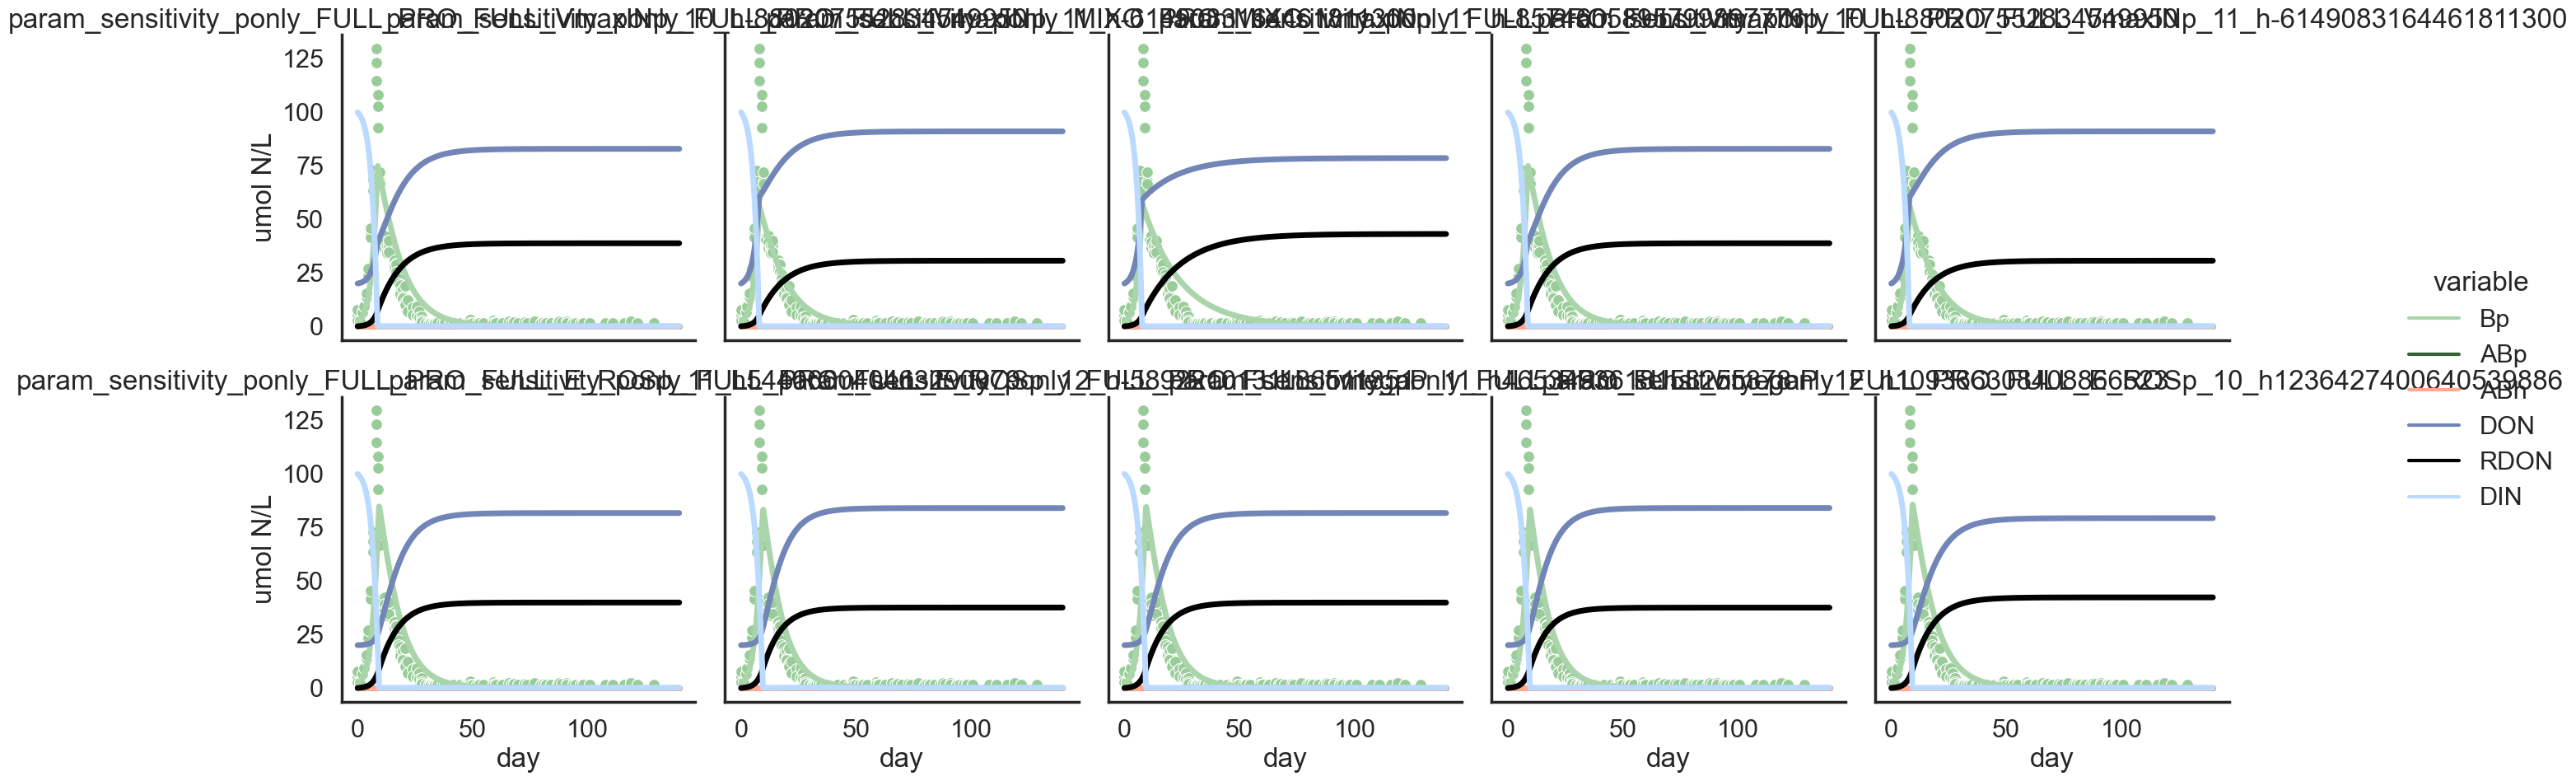

In [164]:
plt.show()

In [165]:
lowest_ids

16296    param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...
16326    param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...
18126    param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_...
16297    param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...
16328    param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...
2496     param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...
2526     param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...
24126    param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...
24156    param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...
2466     param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...
Name: run_id, dtype: object